# Practice Case Study - Clustering


### Solved by: Razan Aljuhani , Alaa Alharbi , Wejdan Alzahrani , Lena Baeshen - Section: BAR
-----------------------------------------
## Context
-----------------------------------------

Study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the most popular measure used on popular vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

-----------------------------------------
## Objective
-----------------------------------------

To identify if there exist various cluster of countries that are more similar to each other in terms of certain socio-economic factors

------------------------
## Data Dictionary
-------------------------
The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % age of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita

In the dataset, we will not do clustering on the gdp and would rather try to understand the variation of other factors with GDP across the groups that we formed.

## Importing libraries and overview of the dataset

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Loading data and display head.

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Check the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Are there any missing data?
* No

#### Check duplicate entries

In [4]:
duplicate_entries = data['country'].duplicated()
data[duplicate_entries]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### Are there any duplicated entries?
* No

#### Drop column 'Country'

In [5]:
data1= data.copy()
data = data.drop(['country'], axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis

#### Summary Statistics

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


#### Let's check the distribution and outliers for each column in the data

child_mort
Skew : 1.45


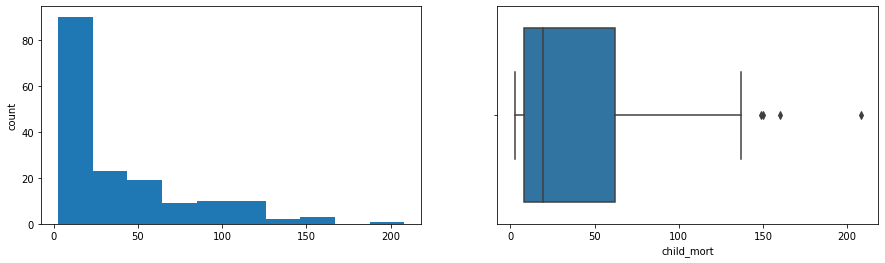

exports
Skew : 2.45


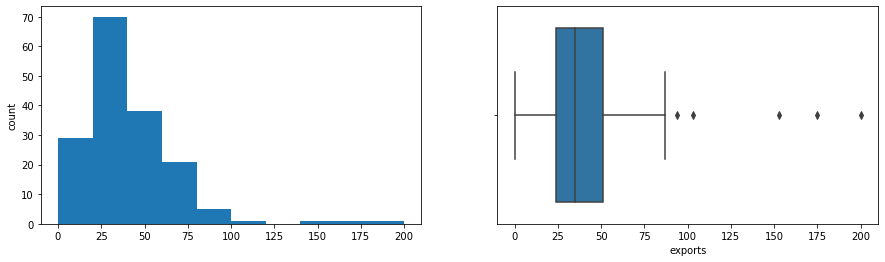

health
Skew : 0.71


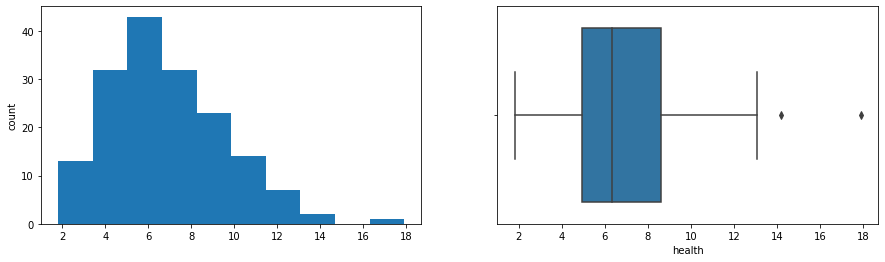

imports
Skew : 1.91


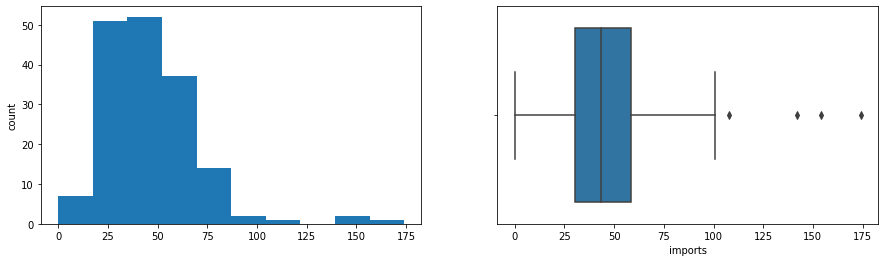

income
Skew : 2.23


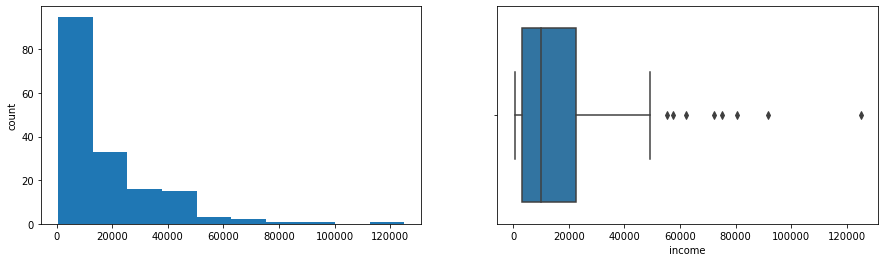

inflation
Skew : 5.15


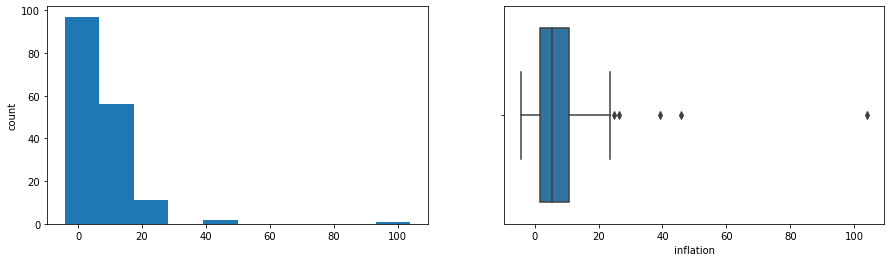

life_expec
Skew : -0.97


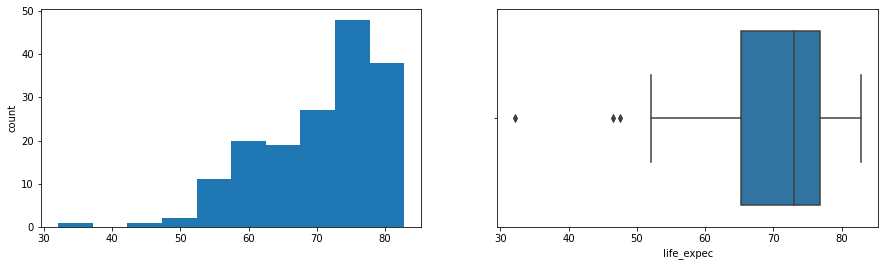

total_fer
Skew : 0.97


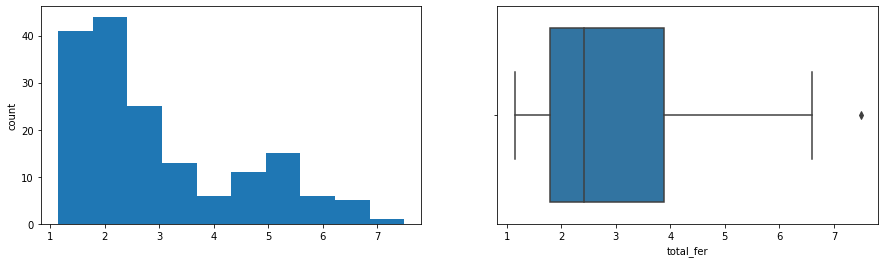

gdpp
Skew : 2.22


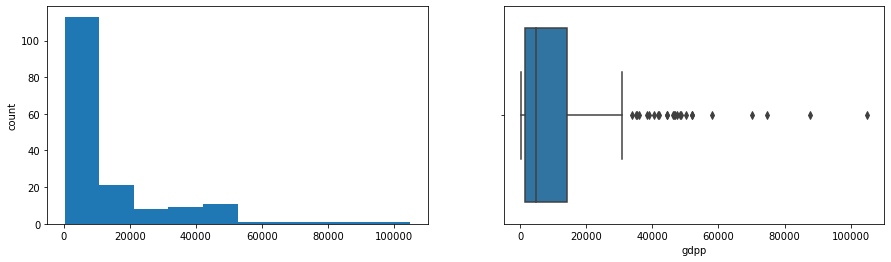

In [7]:
for column in data.columns:
    print(column)
    print('Skew :',round(data[column].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.show()

**Let's check the correlation among the variables**

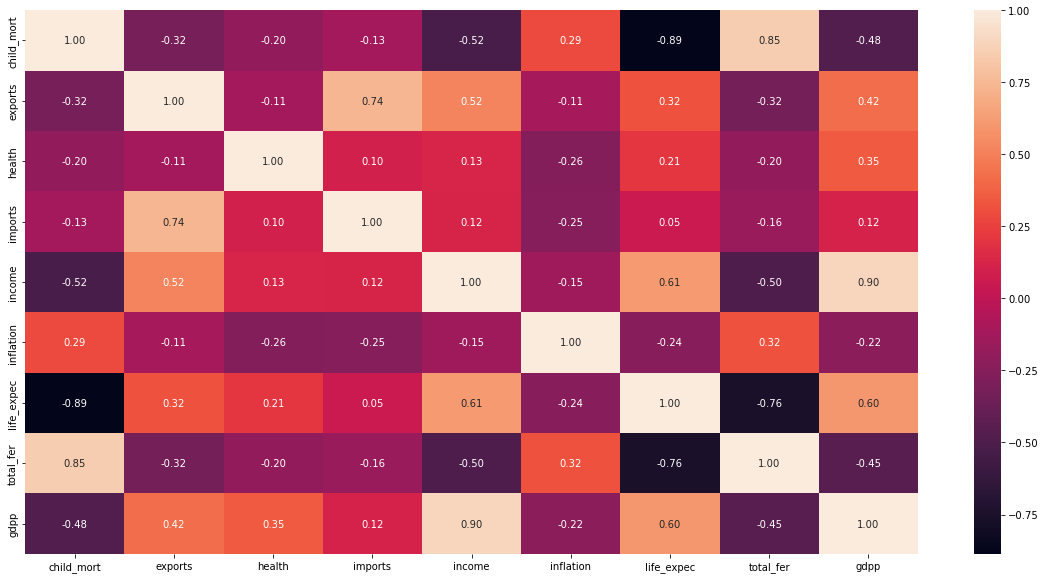

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

#### List the variables that has high positive correlation and high negative correlation.Suppose Threshold for positive correlation=0.8, Threshold for negative correlation=-0.8

high positive correlation
* The variable child_mort has strong positive correlation with total_fer.
* The variable income has strong positive correlation with gdpp.

high negative correlation
* The variable life_expec has strong negative correlation with child_mort.


Note: 
* The light color represent high positive corr between varibles, while the dark color represent high negative corr. 

#### Scaling the data

In [9]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled_copy = data_scaled.copy()
data_scaled.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## K-Means Clustering

#### Find number of clusters using WCSS.

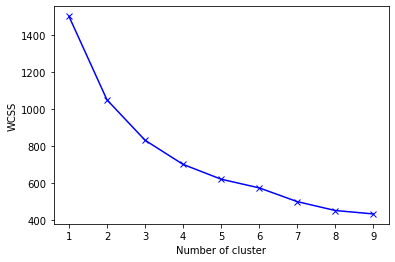

In [10]:
WCSS = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    WCSS[k] = kmeans.inertia_


plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()    

#### Find number of clusters using Silhouette score.

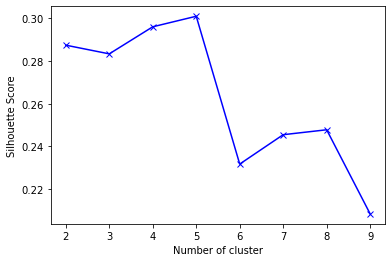

In [11]:
sc = {} 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)
    
#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()    

#### Apply Kmeans clustring

In [12]:
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(data_scaled)
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)
data['Labels'] = kmeans.predict(data_scaled)
data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


#### Find the count for each cluster

In [13]:
data.Labels.value_counts()

1    84
0    47
2    36
Name: Labels, dtype: int64

#### Find mean and median for each cluster.

In [14]:
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,92.961702,21.927381,5.000000,90.20,18.350,4.200
exports,29.151277,40.243917,58.738889,23.80,37.300,50.350
health,6.388511,6.200952,8.807778,5.66,5.930,9.445
imports,42.323404,47.473404,51.491667,40.30,48.650,39.050
income,3942.404255,12305.595238,45672.222222,1870.00,10180.000,40550.000
inflation,12.019681,7.600905,2.671250,8.92,5.805,1.190
life_expec,59.187234,72.814286,80.127778,59.50,73.600,80.350
total_fer,5.008085,2.307500,1.752778,5.06,2.235,1.815
gdpp,1922.382979,6486.452381,42494.444444,897.00,4670.000,41200.000


#### Visulize using boxplot for each columns according to clusters.

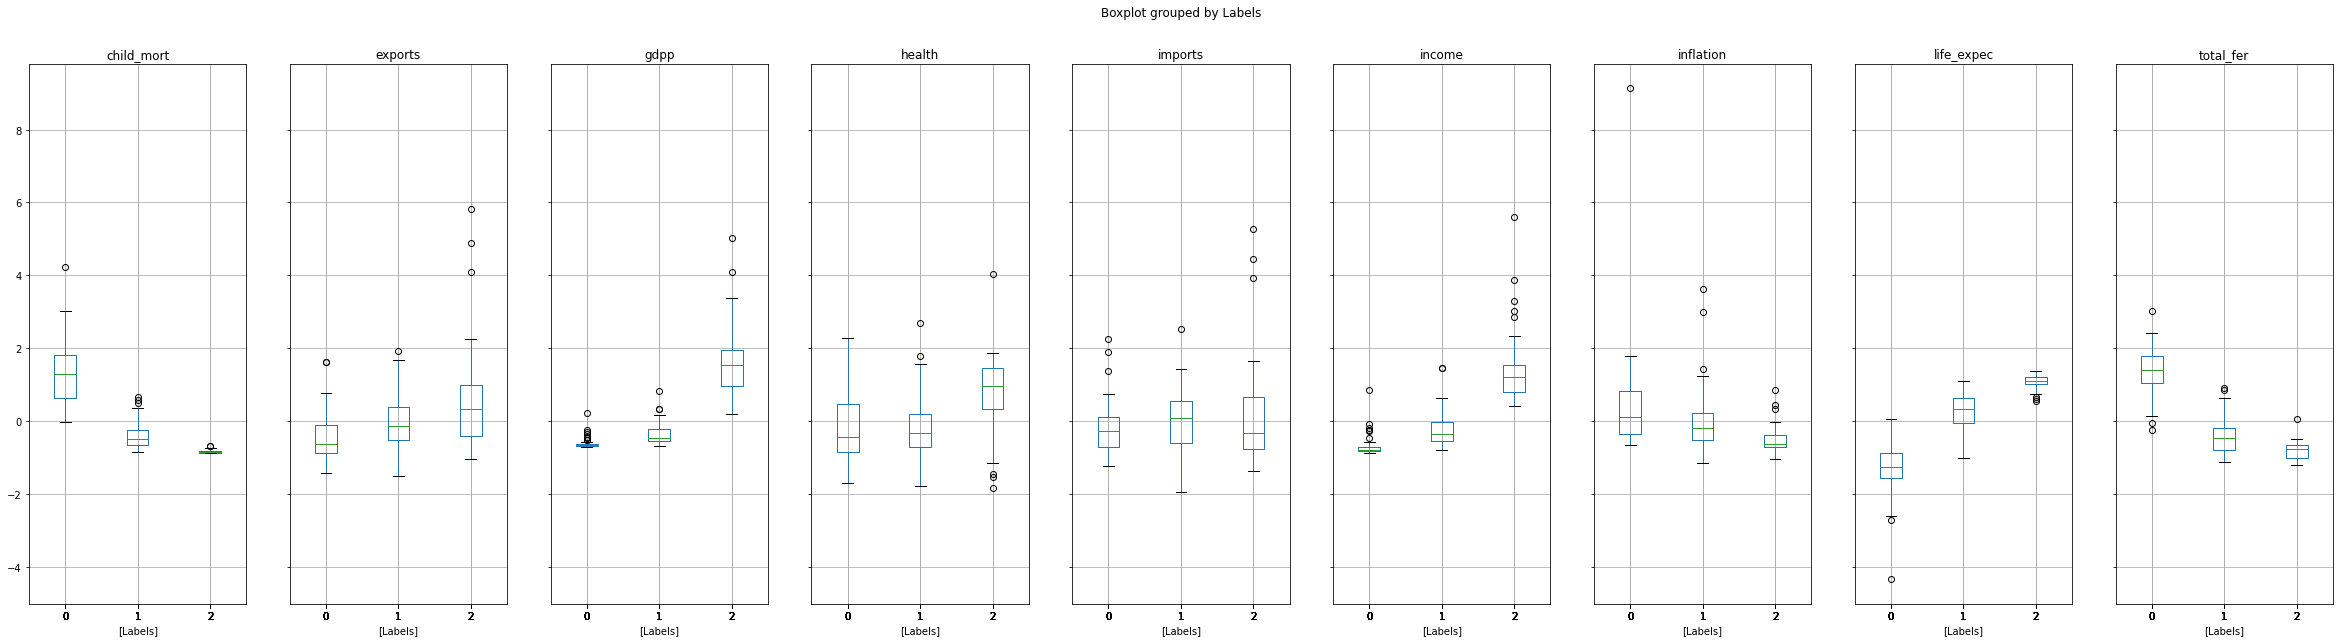

In [15]:
data_scaled_copy.boxplot(by = 'Labels', layout = (1,9),figsize=(40,10))
plt.show()